<h1>Project B : Astronomical Data Imaging </h1>

Mentor: Tanmoy Bhowmik

<br>
Participant: Kazi Nusrat
<br>
mail: kazinusrat236@gmail.com



<h3>Project Task1</h3>
From Single RGB image to Separated filter based Image ( For Red, Green, Blue filter)<br>
Tasks: Create code , Load RGB image, Extract, and save/display for each color filter.


In [2]:
# importing necessary packages
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

In [4]:
# loading a rgb image
filepath = "rgbimage1.fits"
rgb = fits.open(filepath)
with fits.open(filepath) as hdulist:
  header = hdulist[0].header
# print
  for key, value in header.items():
        print(f"{key}: {value}")

SIMPLE: True
BITPIX: 8
NAXIS: 0
EXTEND: True


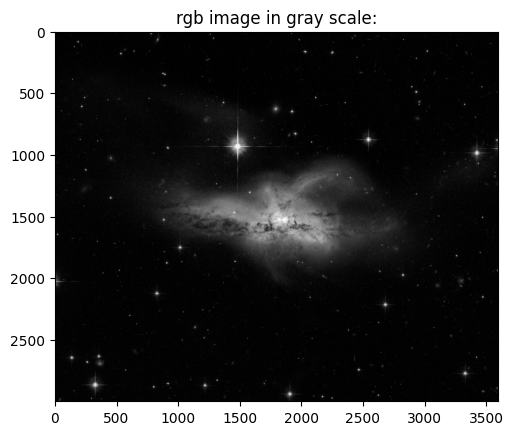

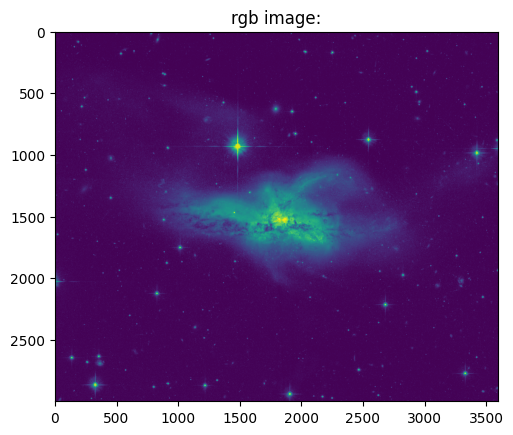

In [13]:
# extracting image data array
rgb_image = rgb[1].data


In [18]:
# reading the rgb image data by separating it into three individual filters:
R = rgb[1].data
G = rgb[2].data
B = rgb[3].data

# normalizing the image:
normR = simple_norm(R, 'sqrt', percent = 99.5)
normG = simple_norm(G, 'sqrt', percent = 99.5)
normB = simple_norm(B, 'sqrt', percent = 99.5)

red_filter_norm = normR(R)
green_filter_norm = normG(G)
blue_filter_norm = normB(B)

# now we create individual image data array for each filter using numpy:
red_filter_image = np.zeros((R.shape[0], R.shape[1], 3), dtype = float)
green_filter_image = np.zeros((R.shape[0], R.shape[1], 3), dtype = float)
blue_filter_image = np.zeros((R.shape[0], R.shape[1], 3), dtype = float)

# putting normalized value to each folter:
red_filter_image[:,:,0] = red_filter_norm
green_filter_image[:,:,1] = green_filter_norm
blue_filter_image[:,:,2] = blue_filter_norm

# checking min max value for the new filterized image:
print("red filter min", R.min(), "red filter max", R.max())
print("green filter min", G.min(), "green filter max", G.max())
print("blue filter min", B.min(), "blue filter max", B.max())

red filter min 0 red filter max 65535
green filter min 0 green filter max 65535
blue filter min 0 blue filter max 65535


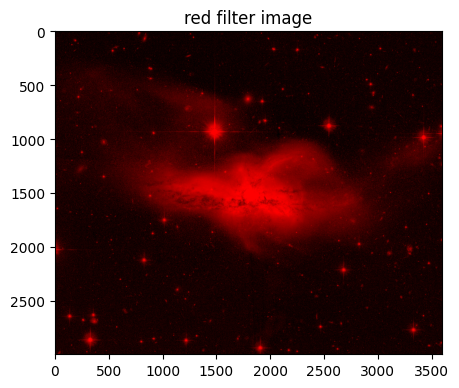

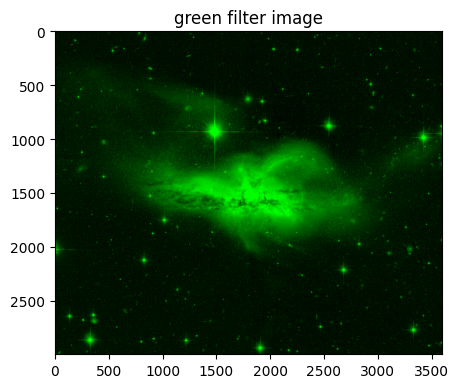

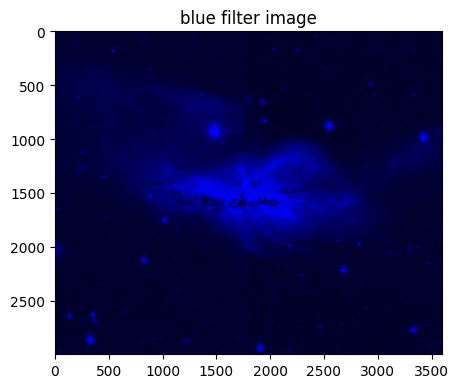

In [26]:
# printing the filtered image with matplotlib:

plt.figure(figsize = (5,5))
plt.imshow(red_filter_image)
plt.title("red filter image")
# plt.colorbar()
plt.show()

plt.figure(figsize = (5,5))
plt.imshow(green_filter_image)
plt.title("green filter image")
# plt.colorbar()
plt.show()

plt.figure(figsize = (5,5))
plt.imshow(blue_filter_image)
plt.title("blue filter image")
# plt.colorbar()
plt.show()

